## Домашнее задание 7

Стребежев Игорь

In [1]:
%%html
<style>video{width:480px;height:480px}</style>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib as mpl
import sklearn as skl
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import normalize
from scipy.special import expit
from sklearn.svm import SVC as svm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
% matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(threshold=np.inf)
plt.rc('animation', html='html5')
plt.rcParams["figure.figsize"] = 8, 8

### task 1

Примените метод SVM (например, из библиотеки sklearn) для датасета `blobs2`. Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [4]:
df = pd.read_csv(f'blobs2.csv')
X = df.drop('label', 1).as_matrix()
Y = df.label.values


def run(X, Y, clf, title):
    clf.fit(X, Y)

    plt.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap=plt.cm.Paired)
    plt.title(title)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 10)
    yy = np.linspace(ylim[0], ylim[1], 10)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, color='#673ab7', facecolors='none', alpha=0.7)
    plt.show()

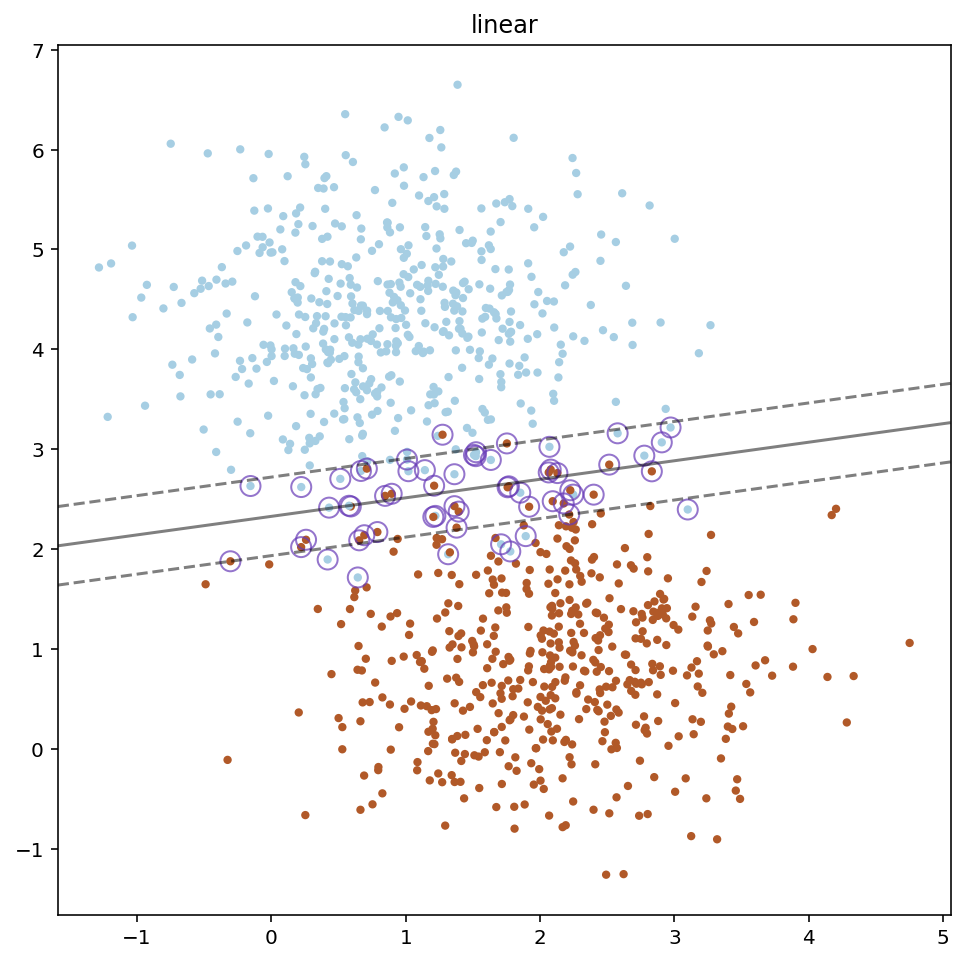

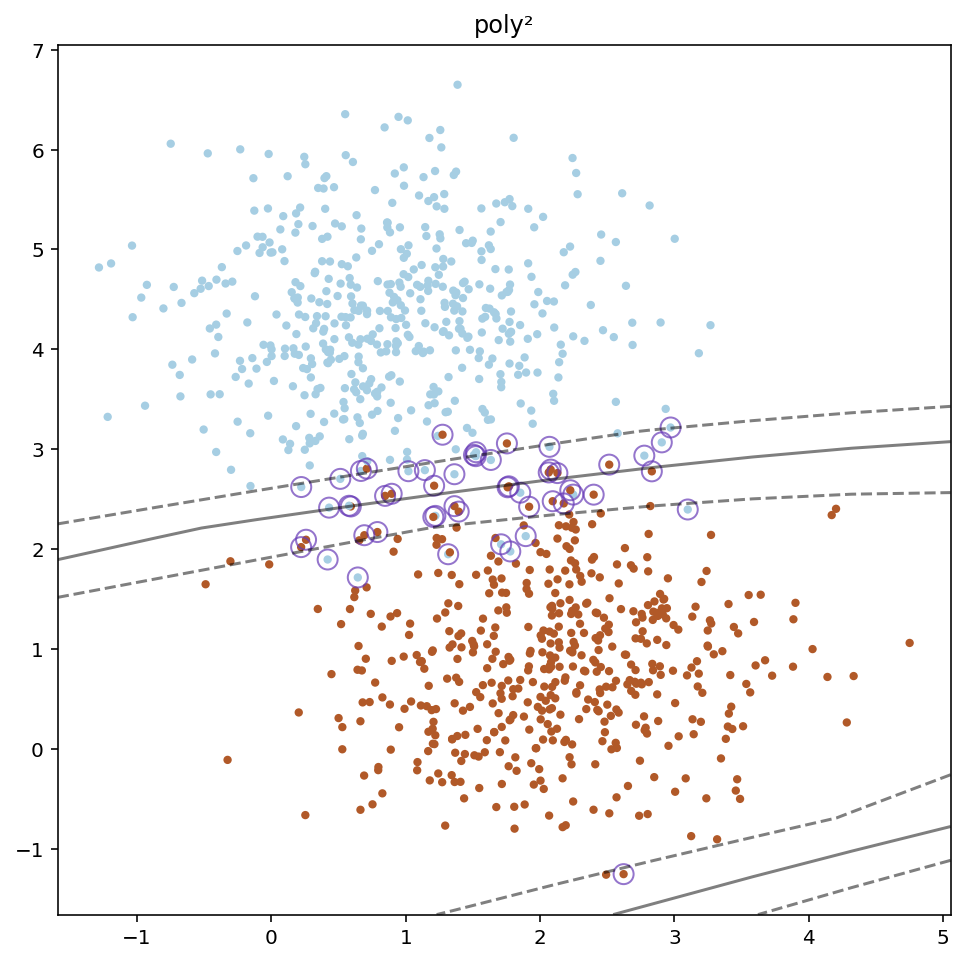

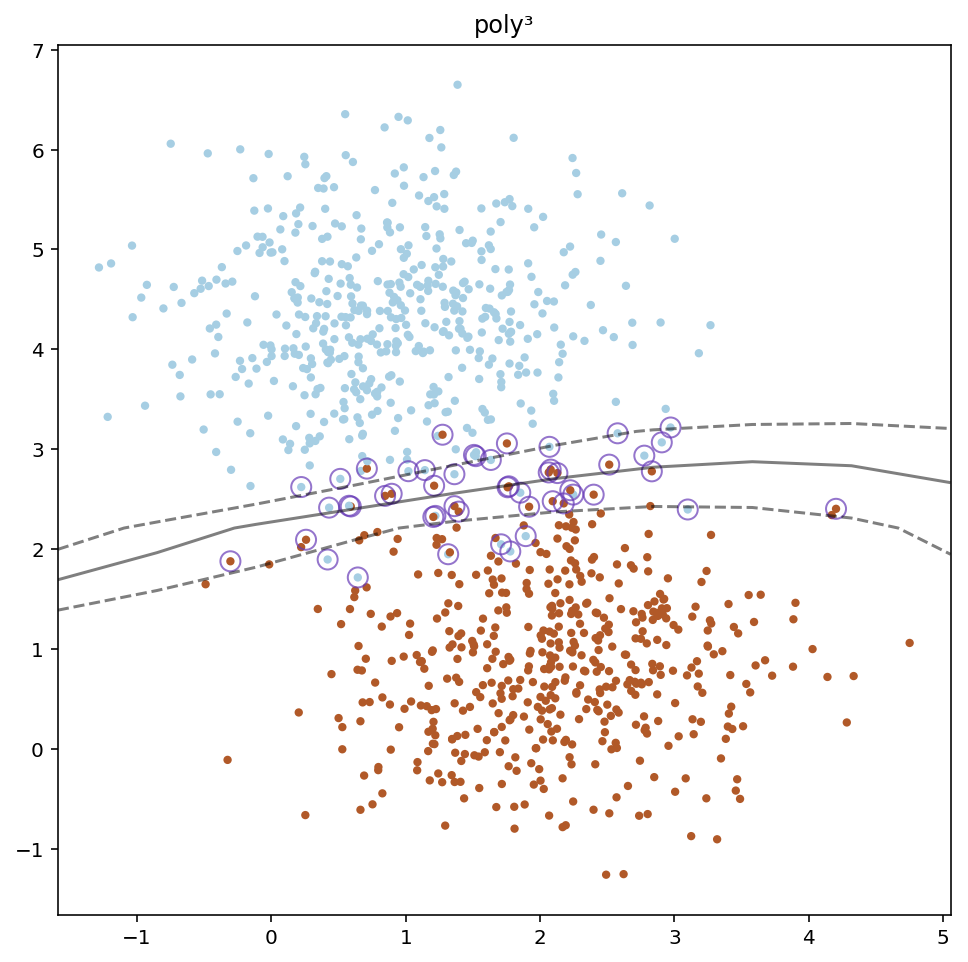

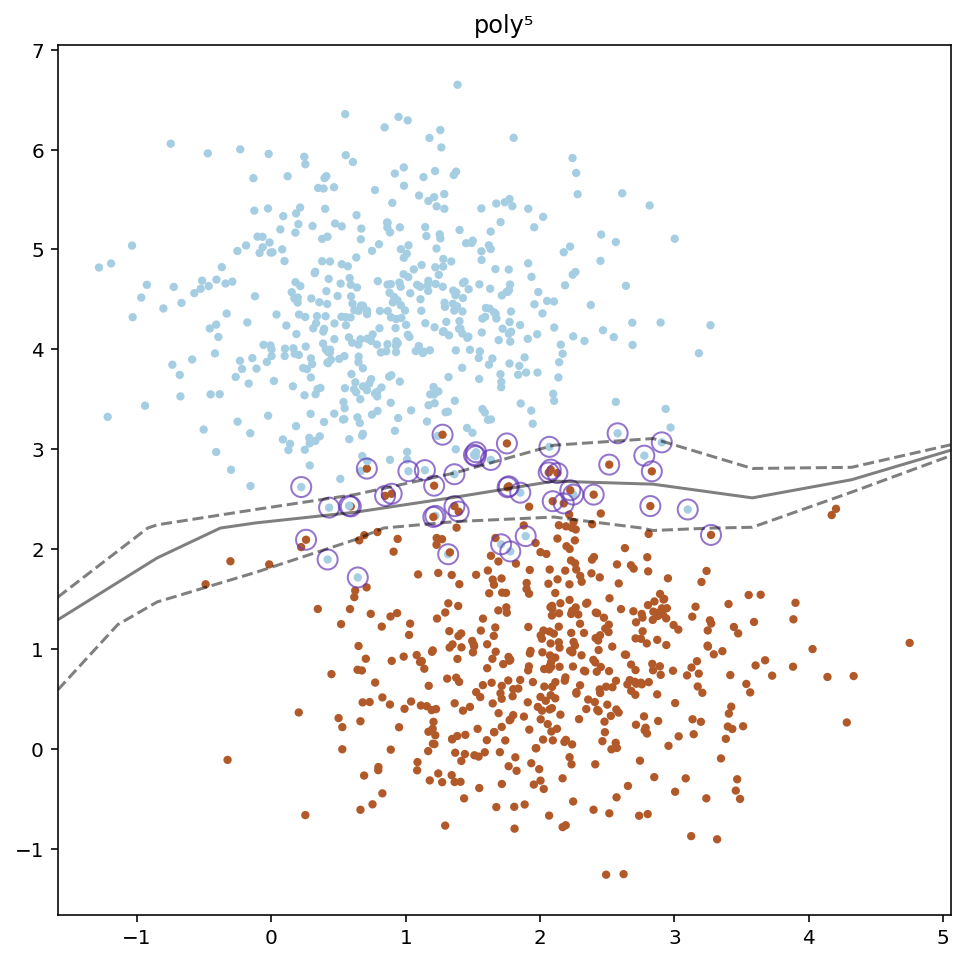

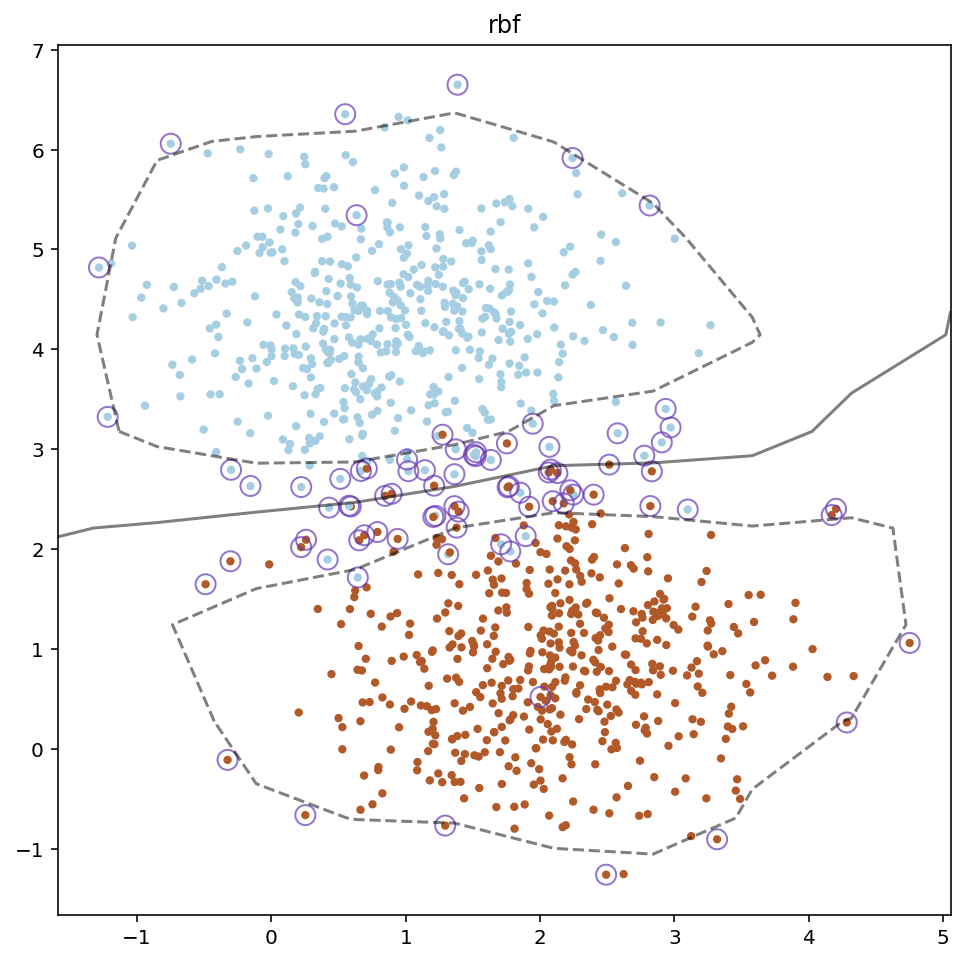

In [64]:
run(X, Y, svm(kernel='linear'), 'linear')
run(X, Y, svm(kernel='poly', degree=2), 'poly²')
run(X, Y, svm(kernel='poly', degree=3), 'poly³')
run(X, Y, svm(kernel='poly', degree=5), 'poly⁵')
run(X, Y, svm(kernel='rbf'), 'rbf')

### task 2

Примените метод SVM для датасетов `cancer` и `spambase`, разбитый предварительно на train(90%) и validate(10%). Перебирайте параметры (ядра, параметры ядер, регуляризация), визуализируйте следующие отношения (scatterplot):

* (кол-во опорных векторов) vs. (ошибка на train)
* (кол-во опорных векторов) vs. (ошибка на test) 
* (кол-во опорных векторов) vs. (разница между ошибкой на train и test).

#### spambase

In [46]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(f'spambase.csv')
X = df.drop('label', 1).as_matrix()
Y = df.label.values
X, Xv, Y, Yv = tts(X, Y, test_size=0.1)

scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X  = scaling.transform(X)
Xv = scaling.transform(Xv)

def draw():
    vecs, accX, accXV = np.array(res).T
    ein   = 1 - accX
    eout  = 1 - accXV

    plt.scatter(vecs, ein,  label='support vectors vs train err')
    plt.scatter(vecs, eout, label='support vectors vs test err')
    plt.scatter(vecs, np.abs(ein - eout), label='|test err - train err|')
    plt.xlabel('support vectors'); plt.legend()
    plt.ylim([0, max([ein.max(), eout.max(), (ein - eout).max()]) + 0.1])

###### Линейное ядро

In [3]:
%%time
res = []
for C in np.logspace(-3, 2, num=30):
    print(f'{C:.3f}', end=' ')
    cl = svm(C, 'linear', cache_size=4000, degree=2).fit(X, Y)
    res.append((len(cl.support_), accuracy_score(Y,  cl.predict(X)), accuracy_score(Yv, cl.predict(Xv)),))
print()

0.001 0.001 0.002 0.003 0.005 0.007 0.011 0.016 0.024 0.036 0.053 0.079 0.117 0.174 0.259 0.386 0.574 0.853 1.269 1.887 2.807 4.175 6.210 9.237 13.738 20.434 30.392 45.204 67.234 100.000 
CPU times: user 37.8 s, sys: 279 ms, total: 38.1 s
Wall time: 38.3 s


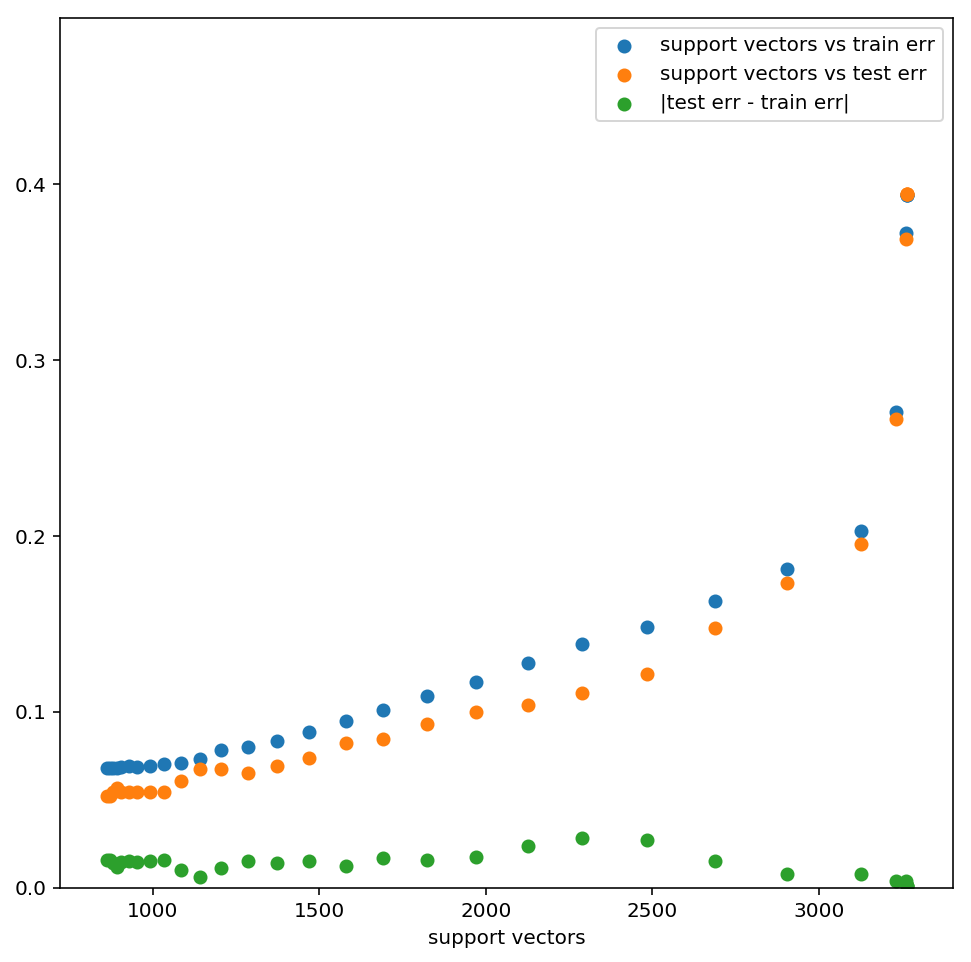

In [47]:
draw()

###### Полиномиальное ядро

In [49]:
%%time
res = []
for C in np.logspace(-3, 2, num=30):
    print(f'{C:.3f}', end=' ')
    for g in ['auto', 0.02, 0.013]:
        cl = svm(C, 'poly', cache_size=4000, degree=2, gamma=g).fit(X, Y)
        res.append((len(cl.support_), accuracy_score(Y,  cl.predict(X)), accuracy_score(Yv, cl.predict(Xv)),))
print()

0.001 0.001 0.002 0.003 0.005 0.007 0.011 0.016 0.024 0.036 0.053 0.079 0.117 0.174 0.259 0.386 0.574 0.853 1.269 1.887 2.807 4.175 6.210 9.237 13.738 20.434 30.392 45.204 67.234 100.000 
CPU times: user 4min 17s, sys: 2.42 s, total: 4min 19s
Wall time: 4min 22s


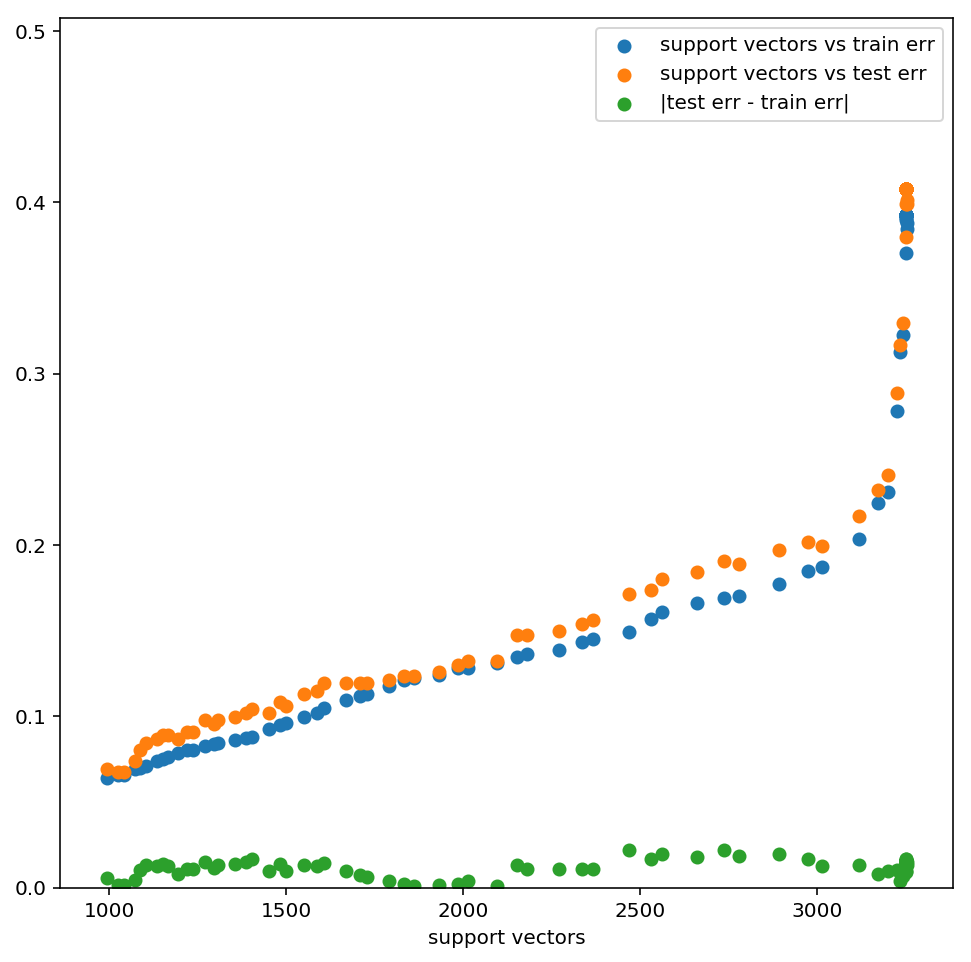

In [50]:
draw()

###### RBF ядро

0.001 0.001 0.002 0.003 0.005 0.007 0.011 0.016 0.024 0.036 0.053 0.079 0.117 0.174 0.259 0.386 0.574 0.853 1.269 1.887 2.807 4.175 6.210 9.237 13.738 20.434 30.392 45.204 67.234 100.000 
CPU times: user 16min 58s, sys: 7.54 s, total: 17min 6s
Wall time: 17min 17s


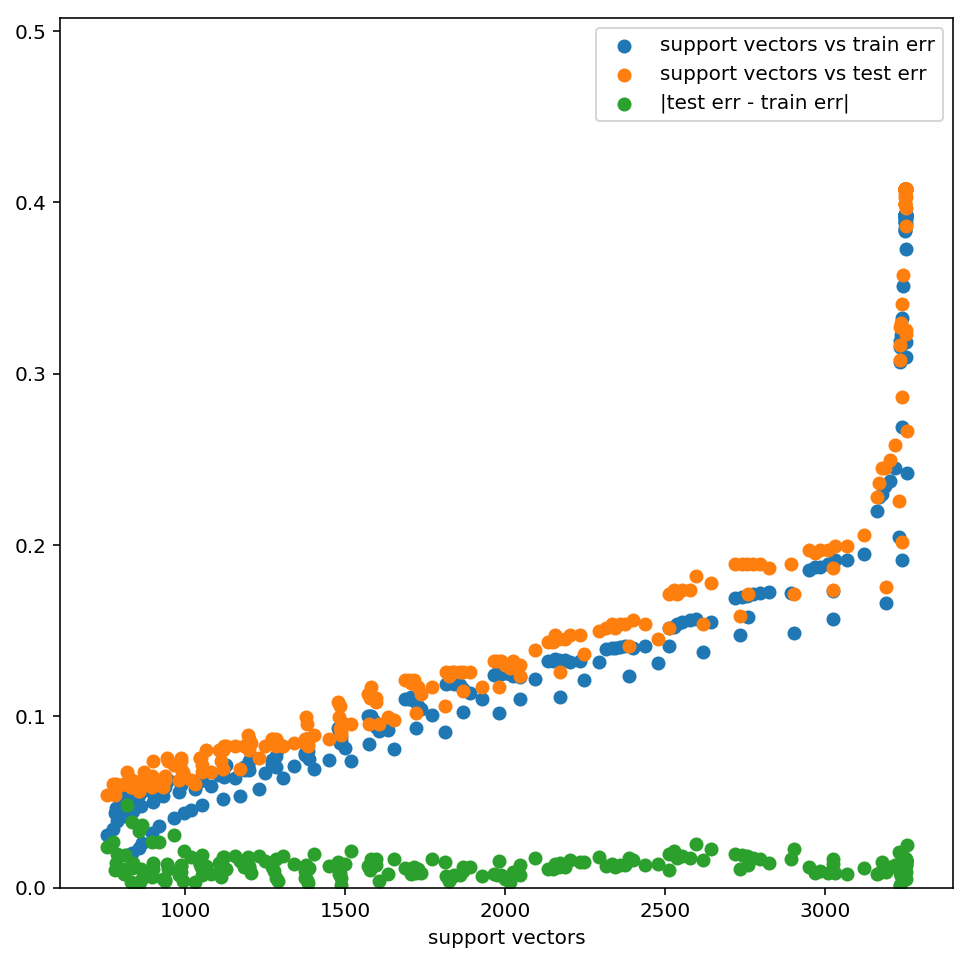

In [52]:
%%time
res = []
for C in np.logspace(-3, 2, num=30):
    print(f'{C:.3f}', end=' ')
    for g in np.logspace(-3, 0, num=10):
        cl = svm(C, 'rbf', cache_size=4000, degree=2, gamma=g).fit(X, Y)
        res.append((len(cl.support_), accuracy_score(Y,  cl.predict(X)), accuracy_score(Yv, cl.predict(Xv)),))
print()
draw()

#### cancer

In [53]:
df = pd.read_csv(f'cancer.csv')
X = df.drop('label', 1).as_matrix()
Y = df.label.values
X, Xv, Y, Yv = tts(X, Y, test_size=0.1)

scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X  = scaling.transform(X)
Xv = scaling.transform(Xv)

###### Линейное ядро

0.001 0.001 0.002 0.003 0.005 0.007 0.011 0.016 0.024 0.036 0.053 0.079 0.117 0.174 0.259 0.386 0.574 0.853 1.269 1.887 2.807 4.175 6.210 9.237 13.738 20.434 30.392 45.204 67.234 100.000 
CPU times: user 472 ms, sys: 10.8 ms, total: 483 ms
Wall time: 494 ms


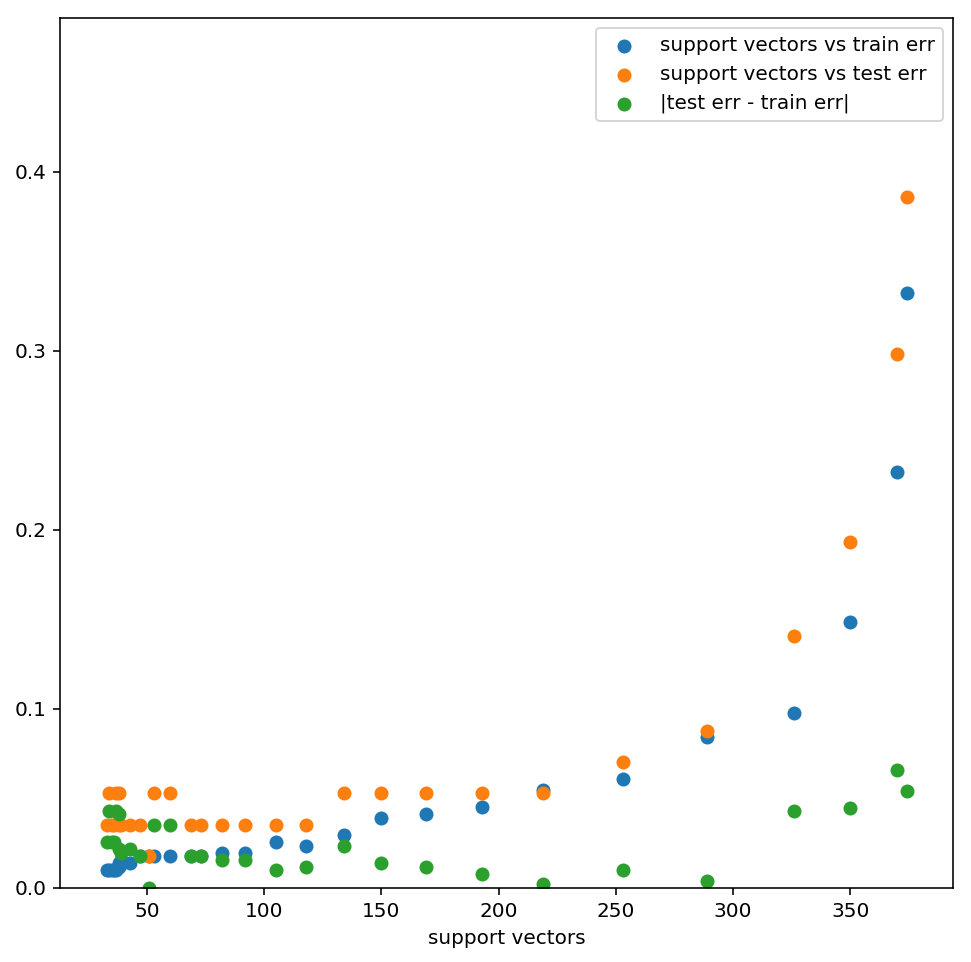

In [54]:
%%time
res = []
for C in np.logspace(-3, 2, num=30):
    print(f'{C:.3f}', end=' ')
    cl = svm(C, 'linear', cache_size=4000, degree=2).fit(X, Y)
    res.append((len(cl.support_), accuracy_score(Y,  cl.predict(X)), accuracy_score(Yv, cl.predict(Xv)),))
print()
draw()

###### Полиномиальное ядро

0.001 0.001 0.002 0.003 0.005 0.007 0.011 0.016 0.024 0.036 0.053 0.079 0.117 0.174 0.259 0.386 0.574 0.853 1.269 1.887 2.807 4.175 6.210 9.237 13.738 20.434 30.392 45.204 67.234 100.000 
CPU times: user 1.62 s, sys: 6.87 ms, total: 1.63 s
Wall time: 1.63 s


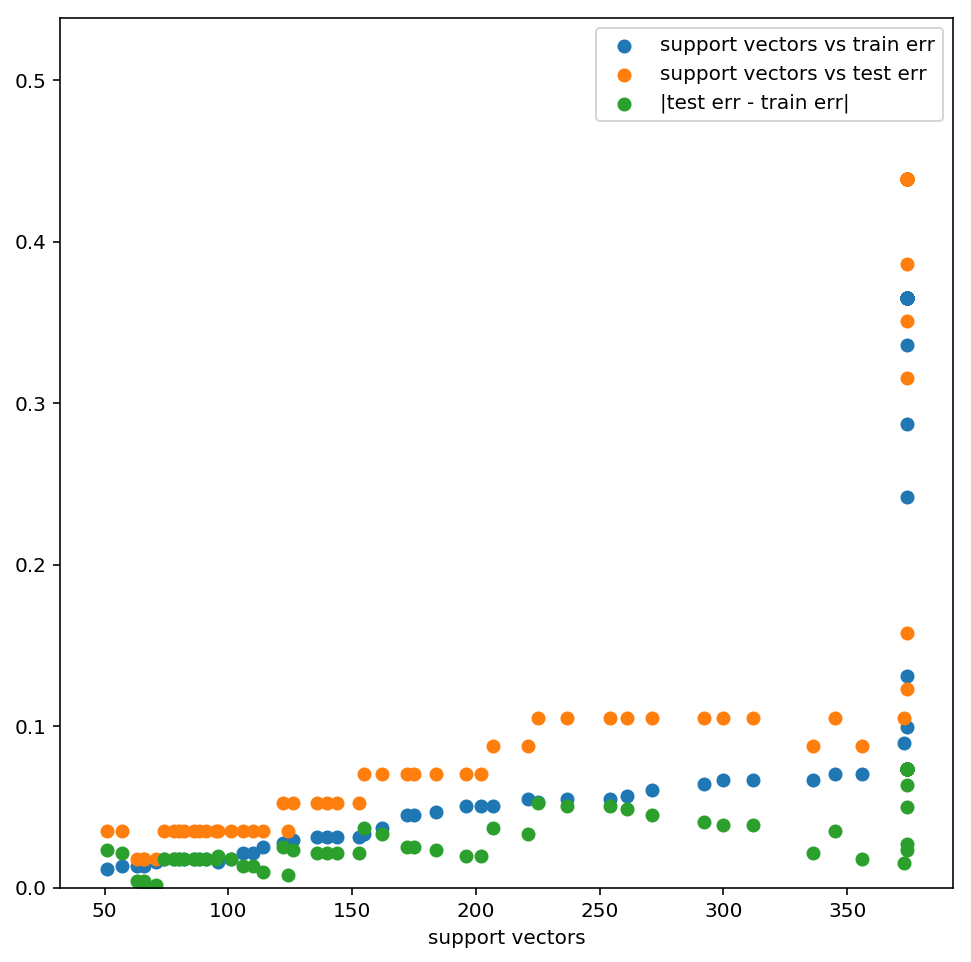

In [55]:
%%time
res = []
for C in np.logspace(-3, 2, num=30):
    print(f'{C:.3f}', end=' ')
    for g in ['auto', 0.02, 0.013]:
        cl = svm(C, 'poly', cache_size=4000, degree=2, gamma=g).fit(X, Y)
        res.append((len(cl.support_), accuracy_score(Y,  cl.predict(X)), accuracy_score(Yv, cl.predict(Xv)),))
print()
draw()

###### RBF ядро

0.001 0.001 0.002 0.003 0.005 0.007 0.011 0.016 0.024 0.036 0.053 0.079 0.117 0.174 0.259 0.386 0.574 0.853 1.269 1.887 2.807 4.175 6.210 9.237 13.738 20.434 30.392 45.204 67.234 100.000 
CPU times: user 7.17 s, sys: 18.6 ms, total: 7.19 s
Wall time: 7.23 s


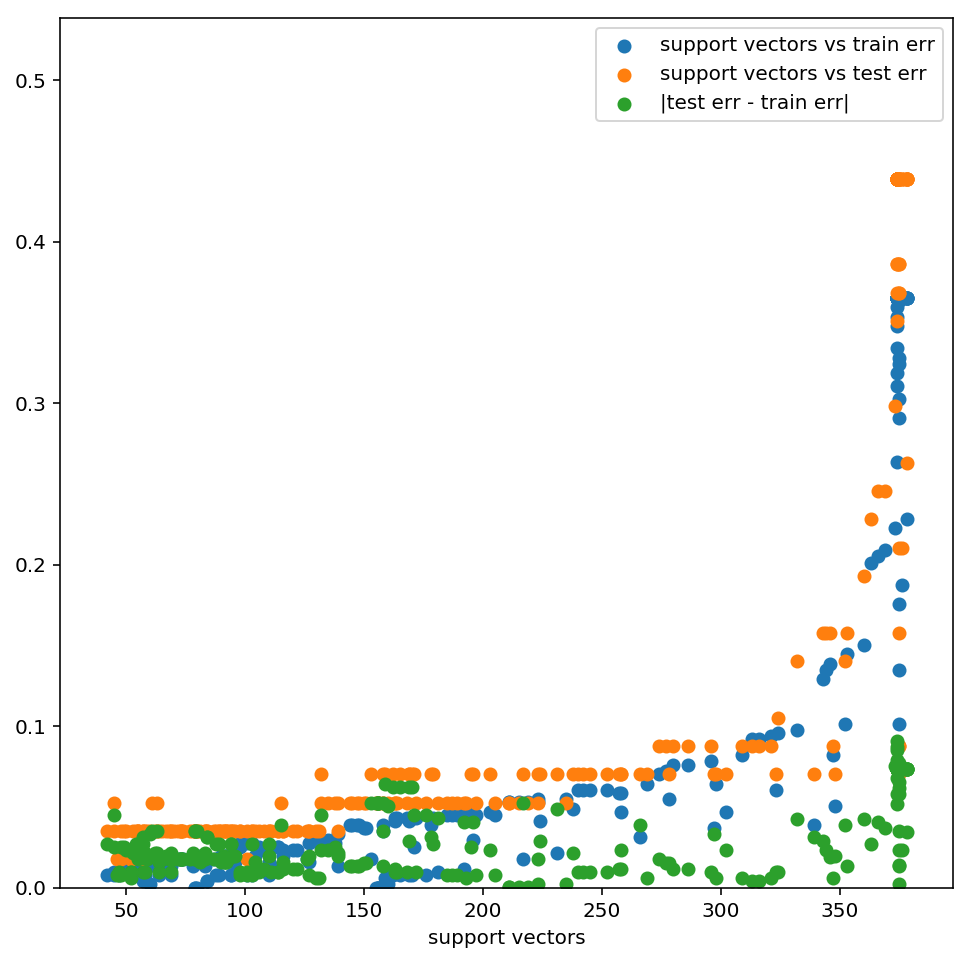

In [56]:
%%time
res = []
for C in np.logspace(-3, 2, num=30):
    print(f'{C:.3f}', end=' ')
    for g in np.logspace(-3, 0, num=10):
        cl = svm(C, 'rbf', cache_size=4000, degree=2, gamma=g).fit(X, Y)
        res.append((len(cl.support_), accuracy_score(Y,  cl.predict(X)), accuracy_score(Yv, cl.predict(Xv)),))
print()
draw()